<a href="https://colab.research.google.com/github/rdwn354/Tensorflow_doc/blob/main/NLP/single_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("imdb_reviews/subwords8k", with_info = True, as_supervised = True)
tokenizer = info.features['text'].encoder

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete2IX7U6/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete2IX7U6/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete2IX7U6/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [2]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

train_data, test_data = dataset['train'], dataset['test']

train_dataset= train_data.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [3]:
import tensorflow as tf

embedding_dim = 64
lstm_dim = 64
dense_dim = 64

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598209 (2.28 MB)
Trainable params: 598209 (2.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [5]:
NUM_EPOCHS = 10

history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 47s 367ms/step - loss: 0.5339 - accuracy: 0.7117 - val_loss: 0.4258 - val_accuracy: 0.8394
Epoch 2/10
98/98 [==============================] - 30s 300ms/step - loss: 0.2981 - accuracy: 0.8824 - val_loss: 0.3910 - val_accuracy: 0.8255
Epoch 3/10
98/98 [==============================] - 27s 271ms/step - loss: 0.2246 - accuracy: 0.9180 - val_loss: 0.3739 - val_accuracy: 0.8609
Epoch 4/10
98/98 [==============================] - 26s 258ms/step - loss: 0.1806 - accuracy: 0.9371 - val_loss: 0.4009 - val_accuracy: 0.8501
Epoch 5/10
98/98 [==============================] - 25s 251ms/step - loss: 0.1858 - accuracy: 0.9349 - val_loss: 0.4670 - val_accuracy: 0.8278
Epoch 6/10
98/98 [==============================] - 24s 239ms/step - loss: 0.1474 - accuracy: 0.9476 - val_loss: 0.4438 - val_accuracy: 0.8460
Epoch 7/10
98/98 [==============================] - 28s 281ms/step - loss: 0.1211 - accuracy: 0.9591 - val_loss: 0.5440 - val_accuracy: 0.8386

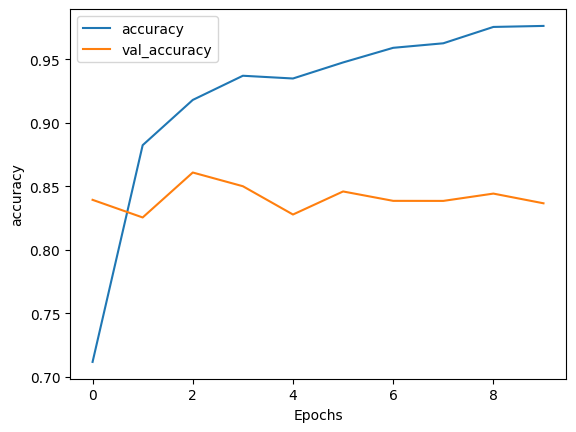

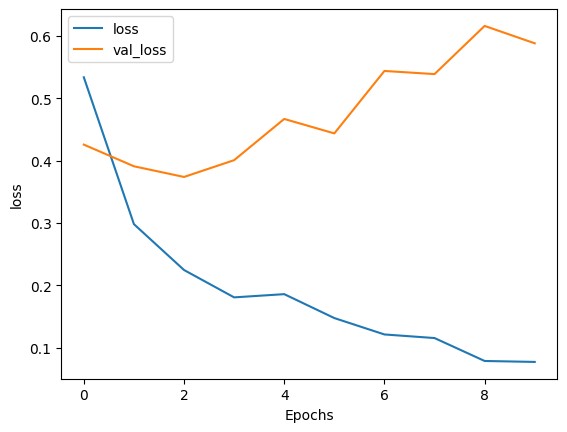

In [6]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")